# Elektrotechnisch integrieren mit Spulen und Kondensatoren

In [1]:
# Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')

Mathematisch ist das Verhalten von Strom und Spannung an Kondensatoren und Induktivitäten (Spulen) mit Integration bzw. Differentiation (Ableitung) beschreibbar. In diesem Notebook kann man mit den Funktionen "spielen", um ihr Verhalten besser zu verstehen.

### Kondensator

Ein Kondensator wird mit einem Strom auf eine bestimmte Spannung aufgeladen, d.h. er integriert das Stromsignal. Ist der Kondensator zuvor schon auf eine Spannung $u(t=0)$ aufgeladen, so muss man diesen Wert hinzuaddieren, um den richtigen Endwert zu erhalten.

\begin{equation}
u_C(t_1)=\frac{1}{C}\int_0^{t_1} i_C(t)dt + u_C(t=0)
\end{equation}

Aus einem Spannungsverlauf $u_C(t)$ am Kondensator erhält man demzufolge über Ableiten auch den Stromverlauf $i_C(t)$. 

\begin{equation}
i_C(t)=C\cdot \frac{du_C(t)}{dt}
\end{equation}

Da in einem realen System immer Widerstände (mindestens der Leitungen) vorkommen, kann man das Verhalten von $u_C(t)$ und $i_C(t)$ an der folgenden Abbildung betrachten.

![title](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Rc_glied.svg/1024px-Rc_glied.svg.png)

### Induktivität

Bei einer Induktivität führt die Selbstinduktion bei Stromänderung dazu, dass eine Spannung anliegt.

\begin{equation}
u_L(t)=L\cdot\frac{di_L(t)}{dt}
\end{equation}

Der Strom lässt sich also auch durch Integration bestimmen, wobei man einen ggf. vorher schon fließenden Gleichstrom $i(t=0)$ hinzuaddieren muss, denn nur die Strom**änderung** führt eine Induktionsspannung herbei. 

\begin{equation}
i_L(t_1)=i_L(t=0)+\int_0^{t_1}u_L(t)dt
\end{equation}

Da in einem realen System immer Widerstände (mindestens der Leitungen) vorkommen, kann man das Verhalten von $u_L(t)$ und $i_L(t)$ an der folgenden Abbildung betrachten (dort ist, da es eine englischsprachige Quelle ist, $V$ für die Spannung eingetragen). 

![title](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8b/Series-RL.png/250px-Series-RL.png)

## Kondensatorverhalten

### Konstanter Ladestrom

Text(0, 0.5, 'Spannung $u_C$ [V]')

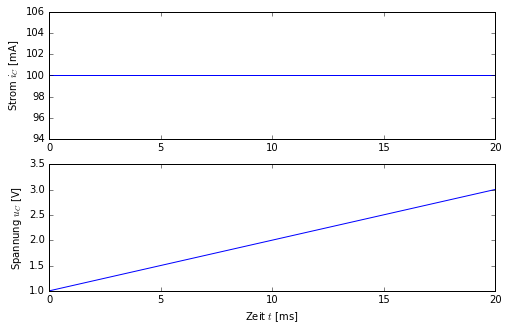

In [31]:
# Zeitvektor
t = np.linspace(0,20e-3,1000) # von 0 bis 20 ms in 1000 Schritten
# konstanter Strom
i1 = 0.1 # 100 mA
i1 = i1*np.ones(len(t)) # zu jedem Zeitpunkt konstant
# Kapazität
C = 1e-3 # 1 mF
# Spannung zu Beginn
u0 = 1 # 1 Volt
# Spannung bestimmen
u1 = u0 + (1/C)*np.cumsum(i1*t[1]-t[0])

# zwei Diagramme in einem mit subplot
plt.figure(figsize=(8,5))
plt.subplot(2,1,1)
# im Diagramm darstellen
plt.plot(1000*t,1000*i1)
# Diagramm beschriften
plt.ylabel('Strom $i_C$ [mA]')
# zweites Diagramm
plt.subplot(2,1,2)
# Spannung im Diagramm darstellen
plt.plot(1000*t,u1)
# Diagramm beschriften
plt.xlabel('Zeit $t$ [ms]')
plt.ylabel('Spannung $u_C$ [V]')

**Aufgabe: Stellen Sie die Anfangsspannung so ein, dass der Kondensator am Ende des betrachteten Zeitraums entladen ist.**

*Tragen Sie hier das Ergebnis ein.*

### Beliebiger Ladestrom

Text(0, 0.5, 'Spannung $u_C$ [mV]')

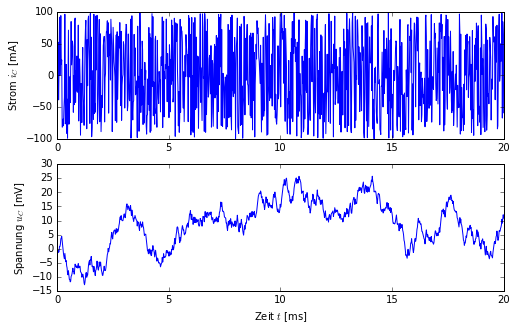

In [41]:
# Zeitvektor
t = np.linspace(0,20e-3,1000) # von 0 bis 20 ms in 1000 Schritten

# beliebiger zeitabhängiger Ladestrom 
# - zum Auswählen des jeweiligen Stroms das # entfernen und
# - beim anderen Strom jeweils das # am Anfang ergänzen (auskommentieren)
i2 = 0.2*(np.random.rand(len(t))-.5) # Zufallszahlen um Nullpunkt herum
# i2 = 0.2*np.cos(t) # Cosinus
# i2 = t**2 # Quadratische Abhängigkeit von der Zeit

# Kapazität
C = 1e-3 # 1 mF
# Spannung zu Beginn
u0 = 0 # 0 Volt
# Spannung bestimmen
u2 = u0 + (1/C)*np.cumsum(i2*t[1]-t[0])

# zwei Diagramme in einem mit subplot
plt.figure(figsize=(8,5))
plt.subplot(2,1,1)
# im Diagramm darstellen
plt.plot(1000*t,1000*i2)
# Diagramm beschriften
plt.ylabel('Strom $i_C$ [mA]')
# zweites Diagramm
plt.subplot(2,1,2)
# Spannung im Diagramm darstellen
plt.plot(1000*t,1000*u2)
# Diagramm beschriften
plt.xlabel('Zeit $t$ [ms]')
plt.ylabel('Spannung $u_C$ [mV]')

**Aufgabe: Finden sie eine Funktion für den Strom, bei der die Kondensatorspannung regelmäßig zurück auf Null geht.**

*Tragen Sie hier das Ergebnis ein.*

### Linear steigende Kondensatorspannung

Text(0, 0.5, 'Strom $i_C$ [nA]')

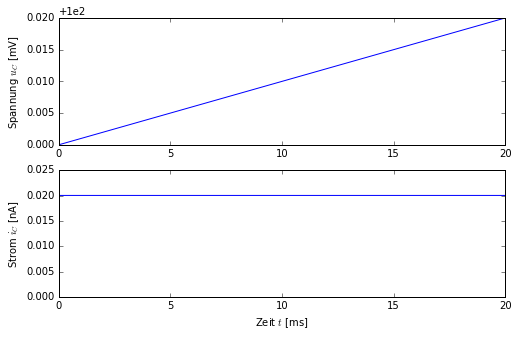

In [74]:
# Zeitvektor
t = np.linspace(0,20e-3,1000) # von 0 bis 20 ms in 1000 Schritten
# linear steigende Kondensatorspannung
u3 = 0.1 + 0.001*t # 0,1 zu Beginn, danach mit 0,001 steigend
# Kapazität
C = 1e-3 # 1 mF
# Strom bestimmen
i3 = C*np.diff(u3)
# noch einen Wert anhängen, da diff einen um 1 verkürzten Vektor ergibt
i3 = np.append(1e-12,i3)

# zwei Diagramme in einem mit subplot
plt.figure(figsize=(8,5))
plt.subplot(2,1,1)
# im Diagramm darstellen
plt.plot(1000*t,1e3*u3)
# Diagramm beschriften
plt.ylabel('Spannung $u_C$ [mV]')
# zweites Diagramm
plt.subplot(2,1,2)
# Spannung im Diagramm darstellen
plt.plot(1000*t,1e9*i3)
# Diagramm beschriften
plt.xlabel('Zeit $t$ [ms]')
plt.ylabel('Strom $i_C$ [nA]')

**Aufgabe: Stellen Sie das Diagramm dar, wenn die Zeitachse bis 100 ms statt bis 20 ms geht. Ändert sich der Strom?**

*Tragen Sie hier das Ergebnis ein.*

**Aufgabe: Geben Sie eine beliebige Funktion für die Kondensatorspannung an und bestimmen Sie den dazugehörigen Strom.**

*Tragen Sie hier Ihre Beobachtungen ein.*

### Rechteckspannung als Eingang

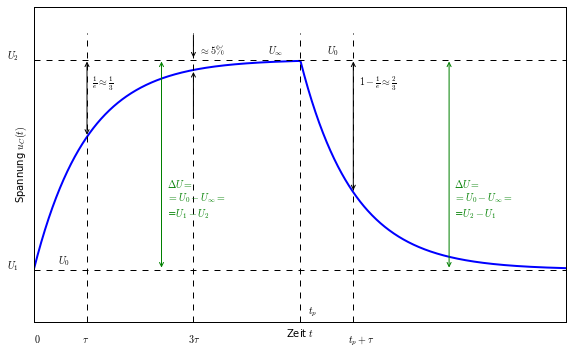

In [75]:
t = np.linspace(0,20e-3,1000)
tau = 2e-3
u1 = .2
u2 = 1
tp = t[500]
u = np.piecewise(t, 
                 [t <=tp, 
                  (t>tp)
                 ], 
                 [lambda t: u1+(u2-u1)*(1-np.exp(-t/tau)),
                 lambda t: u1+(u2-u1)*np.exp(-(t-tp)/tau)]
)
utau1 = u1 + (u2-u1)*(1-np.exp(-tau/tau))
u3tau1 = u1 + (u2-u1)*(1-np.exp(-3*tau/tau))
utau2 = u1 + (u2-u1)*np.exp(-(tau)/tau)
u3tau2 = u1 + (u2-u1)*np.exp(-(3*tau)/tau)
    
plt.figure(figsize=(8,5))
plt.plot(1000*t,u,linewidth=2)
plt.plot(1000*t,u1*np.ones(len(t)),'k--')
plt.plot(1000*t,u2*np.ones(len(t)),'k--')
plt.text(0,-.08,'$0$')
plt.text(-1,u1,r'$U_1$')
plt.text(-1,u2,r'$U_2$')
plt.plot(1000*tau*np.ones(1000),np.linspace(0,1.1*u2,1000),'k--')
plt.text(900*tau,-.08,r'$\tau$')
plt.plot(3000*tau*np.ones(1000),np.linspace(0,1.1*u2,1000),'k--')
plt.text(2900*tau,-.08,r'$3\tau$')
plt.plot(1000*tp*np.ones(1000),np.linspace(0,1.1*u2,1000),'k--')
plt.text(1030*tp,.03,r'$t_p$')
plt.plot(1000*(tp+tau)*np.ones(1000),np.linspace(0,1.1*u2,1000),'k--')
plt.text(1000*tp+900*tau,-.08,r'$t_p+\tau$')
plt.annotate(s='', xy=(1000*tau,u2), xytext=(1000*tau,utau1), arrowprops=dict(arrowstyle='<->'))
plt.text(1100*tau,0.9*u2,r'$\frac{1}{e}\approx\frac{1}{3}$')
plt.annotate(s='', xy=(2400*tau,u2), xytext=(2400*tau,u1), arrowprops=dict(arrowstyle='<->',color='green'))
deltau1str=r"$\Delta U=$"
deltau1str+="\n" 
deltau1str+=r"$=U_0 - U_\infty=$"
deltau1str+="\n"
deltau1str+="=$ U_1 - U_2$"
plt.text(2500*tau,2*u1,deltau1str,c='green')
plt.annotate(s='', xy=(3000*tau,u3tau1), xytext=(3000*tau,0.8*u3tau1), arrowprops=dict(arrowstyle='->'))
plt.annotate(s='', xy=(3000*tau,1.1*u2), xytext=(3000*tau,u2), arrowprops=dict(arrowstyle='<-'))
plt.text(3100*tau,1.02*u2,r'$\approx5\%$')
plt.text(450*tau,1.1*u1,r'$U_0$')
plt.text(880*tp,1.02*u2,r'$U_\infty$')
plt.text(1100*tp,1.02*u2,r'$U_0$')
plt.annotate(s='', xy=(1000*(tau+tp),utau2), xytext=(1000*(tau+tp),u2), arrowprops=dict(arrowstyle='<->'))
plt.text(1000*tp+1100*tau,0.9*u2,r'$1-\frac{1}{e}\approx\frac{2}{3}$')
plt.annotate(s='', xy=(1000*tp+2800*tau,u2), xytext=(1000*tp+2800*tau,u1), arrowprops=dict(arrowstyle='<->',color='green'))
deltau2str=r"$\Delta U=$"
deltau2str+="\n" 
deltau2str+=r"$=U_0 - U_\infty=$"
deltau2str+="\n"
deltau2str+="=$ U_2 - U_1$"
plt.text(1000*tp+2900*tau,2*u1,deltau2str,c='green')
plt.xlabel('Zeit $t$')
plt.ylabel('Spannung $u_C(t)$')
plt.ylim(0,1.2*u2)
plt.xticks([])
plt.yticks([])
plt.grid()

plt.tight_layout()

**Aufgabe: Bei dieser Graphik, die Sie aus dem Skript kennen, können Sie nun verändern: $\tau$ und $t_p$ können andere Werte annehmen. Wie müssen Sie $\tau$ einstellen, damit die Spannung am Kondensator praktisch rechteckförmig wird? Wie müssen Sie sie einstellen, damit $U_2$ nicht erreicht wird am Kondensator?**

*Tragen Sie hier Ihre Beobachtungen ein.*

**Aufgabe: Übertragen Sie die Abschnitte für das Kondensatorverhalten auf einen neuen Abschnitt, der das Spulenverhalten beschreibt.**

*Ergänzen Sie ebenfalls jeweils Ihre Beobachtungen.*